In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import numbers

In [2]:
data: pd.DataFrame = pd.read_csv("./data/train.csv", index_col="Id")

In [3]:
data_numerical = data.select_dtypes(include='number')
selected_columns = data_numerical.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 22, 24, 26, 27, 28, 29]]
selected_data = data_numerical[selected_columns].copy()
selected_data.dropna(axis=1, inplace=True)

In [4]:
data_ = torch.tensor(selected_data.values.astype(np.float32))

mean = torch.mean(data_, dim=0)
std = torch.std(data_, dim=0)
std[std == 0] = 1

data_normalized = (data_ - mean) / std

X = data_normalized.requires_grad_(True)
y = torch.tensor(data["SalePrice"].values.astype(np.float32)).log()

my_module = nn.Sequential(
    nn.LazyLinear(20),
    nn.ReLU(),
    nn.LazyLinear(15),
    nn.ReLU(),
    nn.LazyLinear(1)
)

# Set up the optimizer and loss function
optimizer = torch.optim.Adam(my_module.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training loop
losses = []
num_epochs = 22000
for epoch in range(num_epochs):
    # Forward pass
    outputs = my_module(X)
    loss = loss_fn(outputs, y.view(-1, 1))
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print intermediate results
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training finished.')

/Users/danielsinkin/GitHub_private/kaggle/.venv/lib/python3.9/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch [100/22000], Loss: 1.5294
Epoch [200/22000], Loss: 0.5968
Epoch [300/22000], Loss: 0.2667
Epoch [400/22000], Loss: 0.1232
Epoch [500/22000], Loss: 0.0704
Epoch [600/22000], Loss: 0.0472
Epoch [700/22000], Loss: 0.0362
Epoch [800/22000], Loss: 0.0305
Epoch [900/22000], Loss: 0.0274
Epoch [1000/22000], Loss: 0.0250
Epoch [1100/22000], Loss: 0.0232
Epoch [1200/22000], Loss: 0.0218
Epoch [1300/22000], Loss: 0.0206
Epoch [1400/22000], Loss: 0.0196
Epoch [1500/22000], Loss: 0.0188
Epoch [1600/22000], Loss: 0.0182
Epoch [1700/22000], Loss: 0.0176
Epoch [1800/22000], Loss: 0.0170
Epoch [1900/22000], Loss: 0.0165
Epoch [2000/22000], Loss: 0.0161
Epoch [2100/22000], Loss: 0.0157
Epoch [2200/22000], Loss: 0.0154
Epoch [2300/22000], Loss: 0.0151
Epoch [2400/22000], Loss: 0.0148
Epoch [2500/22000], Loss: 0.0148
Epoch [2600/22000], Loss: 0.0145
Epoch [2700/22000], Loss: 0.0147
Epoch [2800/22000], Loss: 0.0142
Epoch [2900/22000], Loss: 0.0141
Epoch [3000/22000], Loss: 0.0142
Epoch [3100/22000],

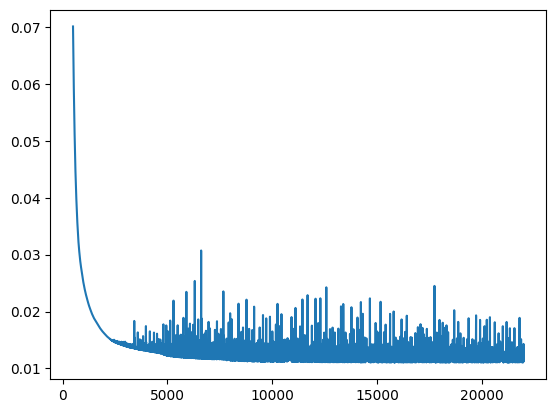

In [5]:
plt.plot(range(500, len(losses[500:]) + 500), losses[500:])

In [6]:
X.shape

torch.Size([1460, 17])

In [9]:
test_data: pd.DataFrame = pd.read_csv("./data/test.csv", index_col="Id")

In [12]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [36]:
data_test = test_data[[c for c in selected_data.columns if c != "SalePrice"]].copy()
data_test_tensor = torch.tensor(data_test.values.astype(np.float32))

data_test_normalized = (data_test_tensor - data_test_tensor.mean()) / data_test_tensor.std()

In [62]:
import numpy as np
import torch

# Assuming 'test_data' and 'selected_data' are already defined
data_test = test_data[[c for c in selected_data.columns if c != "SalePrice"]].copy()

# Fill NaN values with the mean of each column
data_test.fillna(data_test.mean(), inplace=True)

# Convert the DataFrame to a PyTorch tensor
data_test_tensor = torch.tensor(data_test.values.astype(np.float32))

# Normalize the tensor
mean = data_test_tensor.mean(dim=0)
std = data_test_tensor.std(dim=0)
data_test_normalized = (data_test_tensor - mean) / std

# Ensure no NaN entries in the normalized data
assert not torch.isnan(data_test_normalized).any(), "There are NaNs in the normalized data"

In [73]:
data_test["SalePrice"] = my_module(data_test_normalized.detach()).detach().exp()

In [81]:
data_submission = data_test.reset_index().copy()

In [87]:
print(data_submission[["Id", "SalePrice"]].to_csv("submission.csv", index=False))

None
